## Minimum distances PCNA-DNA vs. pcoord

a) Import the modules

In [4]:
import glob
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import itertools

b) Select the trajectory to read

### trace

In [94]:
name = '0_t3_200_1'
dirname = '/home/oriol/calculs/test/trajectories/trace/'
top_file = '1t'
traj_type = "trace"

In [117]:
name = '1_t3_148_0'
dirname = '/home/oriol/calculs/test/trajectories/trace/'
top_file = '1t'
traj_type = "trace"

In [30]:
name = '1_t3b_181_0'
dirname = '/home/oriol/calculs/test/trajectories/trace/'
top_file = '2t'
traj_type = "trace"

In [159]:
name = '1_t3b_163_125'
dirname = '/home/oriol/calculs/test/trajectories/trace/'
top_file = '2t'
traj_type = "trace"

In [133]:
name = '1_b3b_99_115'
dirname = '/home/oriol/perdiux/PCNA/trace/1_b3b/'
top_file = '2b'
traj_type = "trace"

In [143]:
name = '1_b3b_99_0'
dirname = '/home/oriol/perdiux/PCNA/trace/1_b3b/'
top_file = '2b'
traj_type = "trace"

In [237]:
name = '1_a3_86_131'
dirname = '/home/oriol/calculs/test/trajectories/trace/'
top_file = '2a'
traj_type = "trace"

In [244]:
name = '1_a3_87_0'
dirname = '/home/oriol/calculs/test/trajectories/trace/'
top_file = '2a'
traj_type = "trace"

In [15]:
name = '0_b3_157_178'
dirname =  '/home/oriol/calculs/test/trajectories/trace/'
top_file = '2b'
traj_type = "trace"

In [22]:
name = '0_b3_157_2'
dirname =  '/home/oriol/calculs/test/trajectories/trace/'
top_file = '2b'
traj_type = "trace"

### it_traj

In [251]:
name = '1_a3_76'
dirname = '/home/oriol/calculs/test/trajectories/it_traj/'
top_file = '2a'
traj_type = "it_traj"

In [204]:
name = '0_t3_208'
dirname = '/home/oriol/calculs/test/trajectories/it_traj/'
top_file = '1t'
traj_type = "it_traj"

In [213]:
name = '1_t3_152'
dirname = '/home/oriol/perdiux/PCNA/it_traj/1_t3/'
top_file = '1t'
traj_type = "it_traj"

In [12]:
name = '1_t3b_181'
dirname = '/home/oriol/calculs/test/trajectories/it_traj/'
top_file = '1t'
traj_type = "it_traj"

In [5]:
name = '0_b3_160'
dirname = '/home/oriol/perdiux/PCNA/it_traj/b3/'
top_file = '2b'
traj_type = "it_traj"

In [180]:
name = '1_b3b_92'
dirname = '/home/oriol/perdiux/PCNA/it_traj/1_b3b/'
top_file = '2b'
traj_type = "it_traj"

c) Load compiled trajectories and pcoords.dat file

In [13]:
file = 'traj{}.xtc'.format(name)
pcoord_file = dirname+"pcoords{}.dat".format(name)
all_traj = md.load(dirname+file, top='/home/oriol/calculs/test/WESTPA/gromacs_config/frame{}_Protein_DNA.gro'.format(top_file))
pcoords = []
my_file = open(pcoord_file, 'r')
m = my_file.readline()
while m:
    pcoords.append(float(m.split("\t")[1][:-1]))
    m = my_file.readline()
if traj_type == "it_traj":
    all_traj = all_traj[np.argsort(pcoords)]
    pcoords.sort()

print(name,all_traj)

1_t3b_181 <mdtraj.Trajectory with 144 frames, 15139 atoms, 897 residues, and unitcells>


/home/oriol/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/oriol/perdiux/PCNA/it_traj/b3/pcoords0_b3_160.dat' mode='r' encoding='UTF-8'>
  """


d) Selection of atoms to measure the distances between PCNA and DNA

In [14]:
top = all_traj.topology
ca = {}
ca[1] = top.select('sidechain and type N and resid 0 to 254')
ca[2] = top.select('sidechain and type N and resid 255 to 509')
ca[3] = top.select('sidechain and type N and resid 510 to 764')
P = top.select('name P')
cp = {}
cp[1] = P[:39]
cp[2] = P[39:]

e) Measure and plot of minimum distances between DNA and each chain of PCNA

In [15]:
dist = {}
for key in ca:
    pair_array = np.array(list(itertools.product(ca[key],P)))
    dist[key] = np.amin(md.compute_distances(all_traj, pair_array), axis=1) 

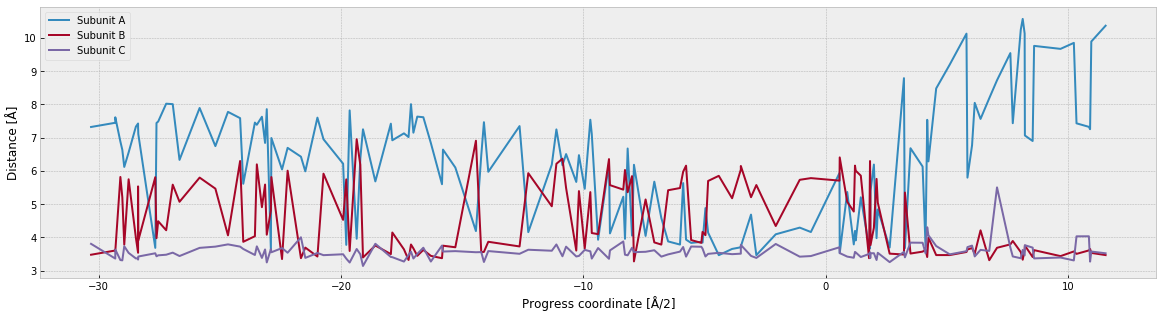

In [16]:
with plt.style.context(('bmh')):
    plt.figure(1, figsize=(20,5))
    line1 = plt.plot(pcoords, dist[1]*10, label = "Subunit A")
    line2 = plt.plot(pcoords, dist[2]*10, label = "Subunit B")
    line3 = plt.plot(pcoords, dist[3]*10, label = "Subunit C")
    plt.xlabel("Progress coordinate [Å/2]")
    plt.ylabel("Distance [Å]")
    plt.legend()
    plt.savefig("Dist_pcoord_1chain_{}.png".format(name))
    plt.show()

f) Measure and plot of minimum distances between each strand of DNA and each chain of PCNA

In [10]:
dist_2ch = {}
for key in ca:
    for strand in cp:
        pair_array = np.array(list(itertools.product(ca[key],cp[strand])))
        new_key = "{}_{}".format(key,strand)
        dist_2ch[new_key] = np.amin(md.compute_distances(all_traj, pair_array), axis=1)  

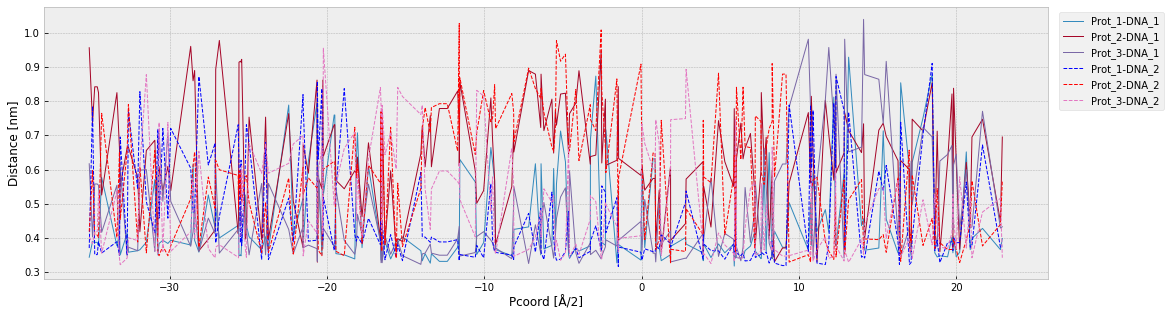

In [11]:
with plt.style.context(('bmh')):
    plt.figure(1, figsize=(18,5))
    line1_1 = plt.plot(pcoords, dist_2ch["1_1"], linewidth =1, label = "Prot_1-DNA_1")
    line2_1 = plt.plot(pcoords, dist_2ch["2_1"], linewidth =1, label = "Prot_2-DNA_1")
    line3_1 = plt.plot(pcoords, dist_2ch["3_1"], linewidth =1, label = "Prot_3-DNA_1")
    line1_2 = plt.plot(pcoords, dist_2ch["1_2"], '--b', linewidth =1, label = "Prot_1-DNA_2")
    line2_2 = plt.plot(pcoords, dist_2ch["2_2"], '--r' ,linewidth =1, label = "Prot_2-DNA_2")
    line3_2 = plt.plot(pcoords, dist_2ch["3_2"], '--', color='tab:pink', linewidth =1, label = "Prot_3-DNA_2")
    plt.xlabel("Pcoord [Å/2]")
    plt.ylabel("Distance [nm]")
    plt.legend(bbox_to_anchor=(1.12, 1))
    plt.savefig("Dist_pcoord_2chain_{}.png".format(name))
    plt.show()